# Gene overlap—NIDA Genetics Consortium Meeting
**Author:** Jesse Marks <br>
**GitHub Issue:** [LIBD Differential Expression Analysis #114](https://github.com/RTIInternational/bioinformatics/issues/114#issuecomment-548519040)

The folks at University of CO have conducted PrediXcan on the GSCAN results and we would like to look-up these genes in the gene-level LIBD differential expression results we have. We want to look at the overlap between the PrediXcan GSCAN gene results and our two brain regions: PFC and NAc.



## Data Description
### LIBD (in-house)
Our in-house differential expression results are located:
* NAc (nucleus accumbes):  `\\rtpnfil02\dhancock\R01DA042090\NAc_RNAexp\deseq2_dge_nac_aa_ea_mega_results.txt`
* PFC (prefrontal cortex): `\\rtpnfil02\dhancock\R01DA042090\PFC_RNAexp\from_libd_drive\tables\Genes_DE_sva_adult.txt`


Line counts:
```
  32030 deseq2_dge_nac_aa_ea_mega_results.txt
    18068 Genes_DE_sva_adult.txt
```

head deseq2_dge_nac_aa_ea_mega_results.txt
```
baseMean        log2FoldChange  lfcSE   stat    pvalue  padj    name
ENSG00000000003.14      427.182844179728        0.02239190620959        0.0385160118882756      0.58136616725903        0.560993694591725       0.969090646513473      TSPAN6
```

head Genes_DE_sva_adult.txt
```
"Chr"   "Start" "End"   "Strand"        "Length"        "Symbol"        "EntrezID"      "logFC" "AveExpr"       "t"     "P.Value" "adj.P.Val"     "B"
"ENSG00000019169"       "chr2"  119699742       119752236       "+"     2079    "MARCO" 8685    -1.60327658933916       -1.80182961895144 -6.14514308161302       4.66989309094823e-09    8.43709584741616e-05    3.6596038673825
```

### GSCAN PrediXcan 
See the 4 text files (separately for smoking initiation, age at initiation, cigarettes per day, and cessation) here:
`\rtpnfil02\dhancock\R01DA042090\GSCAN_PrediXcan_COcenter\PrediXcan\ `

**Line counts:** 
* ai_gscan_prediXcan_all.txt (248,066)
* cpd_gscan_prediXcan_all.txt (39719)
* GTEx_si_no23andme_alltissues_FUSION.txt (45312)
* (248,066) sc_gscan_prediXcan_all.txt


head ai_gscan_prediXcan_all.txt
```
gene    gene_name       zscore  effect_size     pvalue  var_g   pred_perf_r2    pred_perf_pval  pred_perf_qval  n_snps_used     n_snps_in_cov   n_snps_in_model       trait_tissue    prop_snps_used  logP
ENSG00000143951.11      WDPCP   -5.91828169402  -0.0226001583271        3.25322438765e-09       0.27743721894   0.356444750755  1.08690371618e-35    NA       64      65      65      ai_Adipose_Subcutaneous 0.984615384615385       8.48768598069068
```

head cpd_gscan_prediXcan_all.txt
```
gene    gene_name       zscore  effect_size     pvalue  var_g   pred_perf_r2    pred_perf_pval  pred_perf_qval  n_snps_used     n_snps_in_cov   n_snps_in_model       trait_tissue    prop_snps_used  logP
ENSG00000080644.11      CHRNA3  13.8974491      0.35212694      6.56E-44        0.020343131     0.104377534     0.007401798     NA      7       42   42       Brain_Spinal_cord_cervical_c-1  0.166666667     43.18283609
```

head GTEx_si_no23andme_alltissues_FUSION.txt
```
PANEL   FILE    ID      CHR     P0      P1      HSQ     BEST.GWAS.ID    BEST.GWAS.Z     EQTL.ID EQTL.R2 EQTL.Z  EQTL.GWAS.Z     NSNP    NWGT    MODELMODELCV.R2       MODELCV.PV      TWAS.Z  TWAS.P
Brain_Amygdala  /pl/active/IBG/travis/nicotine_TWAS/WEIGHTS/Brain_Amygdala/Brain_Amygdala.ENSG00000000457.9.wgt.RDat    SCYL3   1       1.70e+08     1.70e+08 0.365   rs4656724        4.08   rs12144057       1.24e-02       -3.98    1.32009        560     560     blup     0.15417        9.99e-05      0.46303 0.64334
```

head sc_gscan_prediXcan_all.txt
```
gene    gene_name       zscore  effect_size     pvalue  var_g   pred_perf_r2    pred_perf_pval  pred_perf_qval  n_snps_used     n_snps_in_cov   n_snps_in_model       trait_tissue    prop_snps_used  logP
ENSG00000126215.9       XRCC3   -5.18174351565  -0.0354306541307        2.19821355062e-07       0.0476425260742 0.0959354449877 1.13170641555e-08    NA       8       8       8       sc_Adipose_Subcutaneous 1       6.65793011930524
```

## Pre-processing
**deseq2_dge_nac_aa_ea_mega_results.txt**
* Prepend *ensembl_id* to the header (this header name was missing from results file)
* Remove decimal point and trailing digits from ensembl_id entry (related to ensembl version number for a gene)

**Genes_DE_sva_adult.txt**
* Prepend *ensembl_id* to the header (this header name was missing from results file)

## gene lookup script
We want to append the CPD, SI, SC, and AI P-values and append them to the end of both sets of LIBD differential expression results. So for example, the NAc results with the appended CPD, SI, SC, and AI P-values would look like:

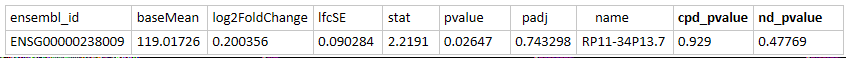

### NAc

In [ ]:
### python3 ###
import re

libd_results = "libd/deseq2_dge_nac_aa_ea_mega_results.txt"
gscan1 = "gscan/ai_gscan_prediXcan_all.txt"
gscan2 = "gscan/cpd_gscan_prediXcan_all.txt"
gscan3 = "gscan/sc_gscan_prediXcan_all.txt"
gscan4 = "gscan/GTEx_si_no23andme_alltissues_FUSION.txt"
outfile = "overlap/libd_nac.gscan_ai+cpd+si+sc_gene_overlap_results.txt"

with open(libd_results) as libF, \
    open(gscan1) as aiF, open(gscan2) as cpdF, \
    open(gscan3) as scF ,open(gscan4) as siF, \
    open(outfile, "w") as outF:

    head = libF.readline().strip()
    head += "\tai_pvalue\tcpd_pvalue\tsc_pvalue\tsi_pvalue\n"
    outF.write(head)

    ai_dict = {}
    cpd_dict = {}
    sc_dict = {}
    si_dict = {}

    next(aiF)
    line = aiF.readline()
    while line:
        sl = line.split()
        gene = sl[0].split(".")[0]
        pvalue = sl[4]
        ai_dict[gene] = pvalue 
        line = aiF.readline()

    next(cpdF)
    line = cpdF.readline()
    while line:
        sl = line.split()
        gene = sl[0].split(".")[0]
        pvalue = sl[4]
        cpd_dict[gene] = pvalue 
        line = cpdF.readline()

    next(scF)
    line = scF.readline()
    while line:
        sl = line.split()
        gene = sl[0].split(".")[0]
        pvalue = sl[4]
        sc_dict[gene] = pvalue 
        line = scF.readline()

    head = siF.readline()
    pdex = head.split().index("TWAS.P")
    line = siF.readline()
    while line:
        try:
            sl = line.split()
            path = sl[1]
            regex = re.compile("ENSG\w+")
            gene = regex.findall(path)[0]
            pvalue = sl[pdex]
            si_dict[gene] = pvalue 
            line = siF.readline()
        except:
            line = siF.readline()

    line = libF.readline()
    while line:
        sl = line.split()
        sl.extend(["na", "na", "na", "na"]) # adding positions for ai, cpd, sc, & si
        ensembl = sl[0]
        if ensembl in ai_dict:
            sl[8] = ai_dict[ensembl]
        if ensembl in cpd_dict:
            sl[9] = cpd_dict[ensembl]
        if ensembl in sc_dict:
            sl[10] = sc_dict[ensembl]
        if ensembl in si_dict:
            sl[11] = si_dict[ensembl]
        
        outline = "\t".join(sl) + "\n"
        outF.write(outline)
        line = libF.readline()

### PFC

In [ ]:
### python3 ###
import re

libd_results = "libd/Genes_DE_sva_adult.txt"
gscan1 = "gscan/ai_gscan_prediXcan_all.txt"
gscan2 = "gscan/cpd_gscan_prediXcan_all.txt"
gscan3 = "gscan/sc_gscan_prediXcan_all.txt"
gscan4 = "gscan/GTEx_si_no23andme_alltissues_FUSION.txt"
outfile = "overlap/libd_pfc.gscan_ai+cpd+si+sc_gene_overlap_results.txt"

with open(libd_results) as libF, \
    open(gscan1) as aiF, open(gscan2) as cpdF, \
    open(gscan3) as scF ,open(gscan4) as siF, \
    open(outfile, "w") as outF:

    head = libF.readline().split()
    head = [x.strip('"') for x in head]
    head.extend(["ai_pvalue", "cpd_pvalue", "sc_pvalue", "si_pvalue"])
    head = "\t".join(head) + "\n"
    outF.write(head)

    ai_dict = {}
    cpd_dict = {}
    sc_dict = {}
    si_dict = {}

    next(aiF)
    line = aiF.readline()
    while line:
        sl = line.split()
        gene = sl[0].split(".")[0]
        pvalue = sl[4]
        ai_dict[gene] = pvalue 
        line = aiF.readline()

    next(cpdF)
    line = cpdF.readline()
    while line:
        sl = line.split()
        gene = sl[0].split(".")[0]
        pvalue = sl[4]
        cpd_dict[gene] = pvalue 
        line = cpdF.readline()

    next(scF)
    line = scF.readline()
    while line:
        sl = line.split()
        gene = sl[0].split(".")[0]
        pvalue = sl[4]
        sc_dict[gene] = pvalue 
        line = scF.readline()

    head = siF.readline()
    pdex = head.split().index("TWAS.P")
    line = siF.readline()
    while line:
        try:
            sl = line.split()
            path = sl[1]
            regex = re.compile("ENSG\w+")
            gene = regex.findall(path)[0]
            pvalue = sl[pdex]
            si_dict[gene] = pvalue 
            line = siF.readline()
        except:
            line = siF.readline()

    line = libF.readline().strip()
    while line:
        sl = line.split()
        sl = [x.strip('"') for x in sl]
        sl.extend(["na", "na", "na", "na"]) # adding positions for ai, cpd, sc, & si
        ensembl = sl[0]
        if ensembl in ai_dict:
            sl[14] = ai_dict[ensembl]
        if ensembl in cpd_dict:
            sl[15] = cpd_dict[ensembl]
        if ensembl in sc_dict:
            sl[16] = sc_dict[ensembl]
        if ensembl in si_dict:
            sl[17] = si_dict[ensembl]
        
        outline = "\t".join(sl) + "\n"
        outF.write(outline)
        line = libF.readline()

Results are stored on jesse's local machine at: <br>
`~/Projects/nicotine/libd/gscan_lookup/gene_based/20191031_predixcan_univ_co`